In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

In [2]:
#load data
df=pd.read_excel('cobaltocenium_data.xlsx')
df.head()

,Unnamed: 0,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [3]:
ml_df=df.copy()

In [4]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [5]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE (kcal/mol)']<=3])
len(drop_bde)

30

In [6]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [7]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>3]
len(ml_df)

873

In [8]:
#conh2 outliers
conh2_df = ml_df[(ml_df["CoCpY' name"]=='(CO)NH₂')|(ml_df["CpY name"]=='(CO)NH₂')]
len(conh2_df)

42

<AxesSubplot: xlabel="EHOMO(Co[CpY][CpY']OH) (Eh)", ylabel='BDE (kcal/mol)'>

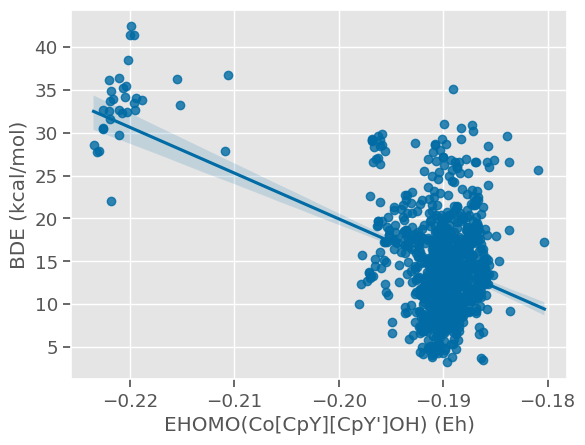

In [9]:
sns.regplot(data = ml_df, x ="EHOMO(Co[CpY][CpY']OH) (Eh)" , y = 'BDE (kcal/mol)')

In [10]:
energy_cols = ["Co[CpY][CpY']OH energy (Eh)", "CoCpY'energy (Eh)", "CpY energy (Eh)"]

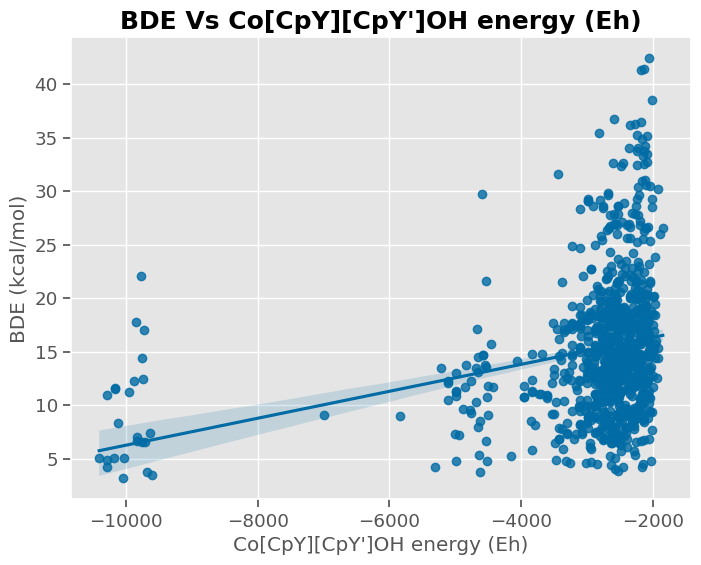

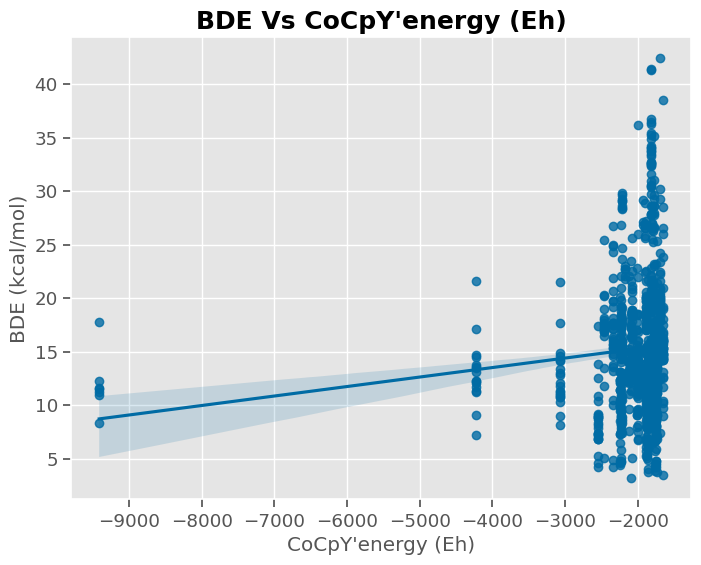

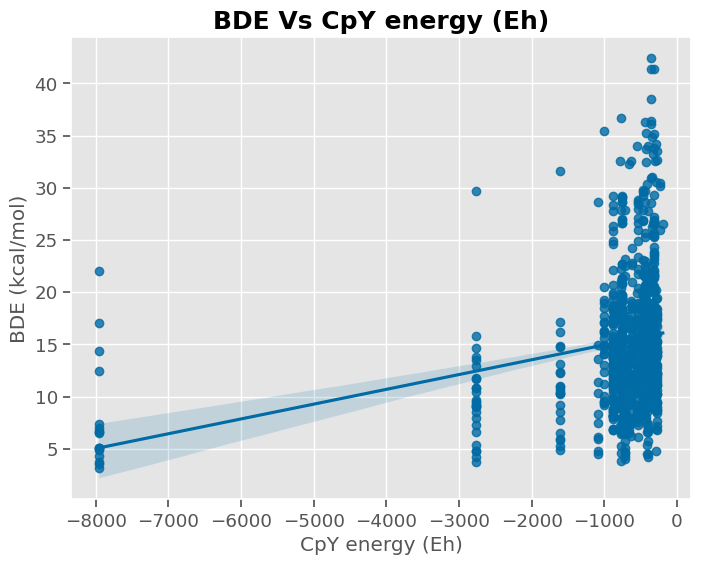

In [11]:
for i in energy_cols:
    plt.figure(figsize=(8,6))
    sns.regplot(data = ml_df, x = i , y = 'BDE (kcal/mol)')
    plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')


In [12]:
complex_energy_out = ml_df[ml_df["Co[CpY][CpY']OH energy (Eh)"]<-8000]
complex_energy_out.to_excel('complex_energy_out.xlsx')
complex_energy_out


,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
24,Co(Cp-N(CH₃)₂)(Cp-CBr₃)OH,-9738.638310,N(CH₃)₂,-1785.987408,CBr₃,-7952.631083,12.436455,17.8470,-0.1859,-0.0782,...,-0.0719,-0.2267,-0.1357,0.011840,0.062475,27.539320,79.34906,-33.790875,3.311007,4.058599
65,Co(Cp-OCH₃)(Cp-CBr₃)OH,-9719.173034,OCH₃,-1766.531474,CBr₃,-7952.631083,6.574309,12.7536,-0.1922,-0.0819,...,-0.0727,-0.2267,-0.1357,-0.015190,0.062475,18.015580,79.34906,-34.606625,3.299961,3.835005
105,Co(Cp-O(CO)CH₃)(Cp-CBr₃)OH,-9832.526791,O(CO)CH₃,-1879.885018,CBr₃,-7952.631083,6.707932,19.5408,-0.1862,-0.0894,...,-0.0855,-0.2267,-0.1357,0.071736,0.062475,27.133680,79.34906,-30.371000,3.297646,3.996539
144,Co(Cp-P(CH₃)₂)(Cp-CBr₃)OH,-10025.246455,P(CH₃)₂,-2072.607246,CBr₃,-7952.631083,5.099240,13.6058,-0.1910,-0.0855,...,-0.0814,-0.2267,-0.1357,-0.059590,0.062475,43.119390,79.34906,-33.100625,3.302437,3.859994
182,Co(Cp-S(CH₃))(Cp-CBr₃)OH,-10042.150696,S(CH₃),-2089.514536,CBr₃,-7952.631083,3.185810,11.9713,-0.1896,-0.0873,...,-0.0817,-0.2267,-0.1357,0.019722,0.062475,27.962050,79.34906,-32.096625,3.307588,3.763506
219,Co(Cp-Ph)(Cp-CBr₃)OH,-9835.718548,Ph,-1883.076259,CBr₃,-7952.631083,7.031545,15.6461,-0.1907,-0.0877,...,-0.0806,-0.2267,-0.1357,-0.000780,0.062475,49.573080,79.34906,-32.316250,3.290476,3.956455
255,Co(Cp-C₂H₃)(Cp-CBr₃)OH,-9682.049197,C₂H₃,-1729.412165,CBr₃,-7952.631083,3.732910,18.1152,-0.1864,-0.0897,...,-0.0802,-0.2267,-0.1357,0.008470,0.062475,17.324220,79.34906,-30.339625,3.294727,4.012085
324,Co(Cp-CH₃)(Cp-CBr₃)OH,-9643.967280,CH₃,-1691.324458,CBr₃,-7952.631083,7.365914,18.3297,-0.1866,-0.0842,...,-0.0778,-0.2267,-0.1357,-0.024960,0.062475,9.172913,79.34906,-32.128000,3.286285,4.006867
357,Co(Cp-C(CH₃)₃)(Cp-CBr₃)OH,-9761.929538,C(CH₃)₃,-1809.288023,CBr₃,-7952.631083,6.545887,18.3961,-0.1866,-0.0849,...,-0.0770,-0.2267,-0.1357,-0.029920,0.062475,43.981350,79.34906,-31.908375,3.298339,4.022779
389,Co(Cp-C₃H₇)(Cp-CBr₃)OH,-9722.607985,C₃H₇,-1769.949792,CBr₃,-7952.631083,17.011742,18.4433,-0.1864,-0.0850,...,-0.0945,-0.2267,-0.1357,-0.033870,0.062475,30.478500,79.34906,-31.814250,3.297238,4.015617


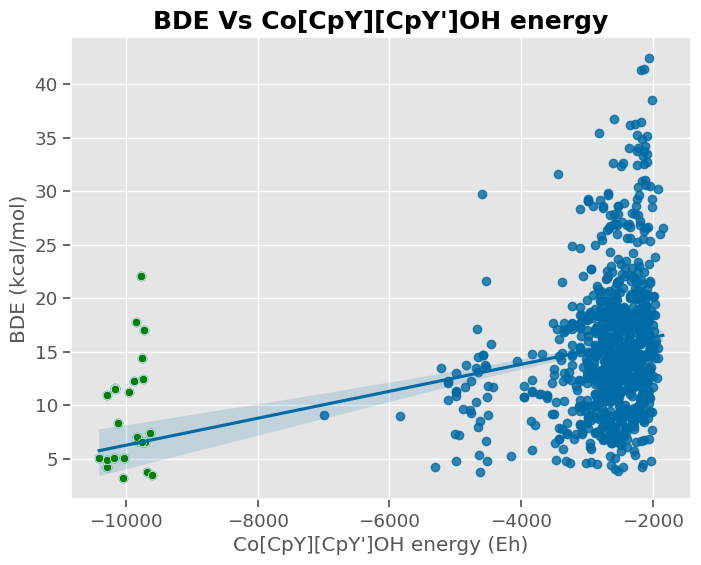

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(data = ml_df, x = "Co[CpY][CpY']OH energy (Eh)" , y = 'BDE (kcal/mol)')
sns.scatterplot(data = complex_energy_out, x = "Co[CpY][CpY']OH energy (Eh)" , y = 'BDE (kcal/mol)', color = 'green')
plt.title(f"BDE Vs Co[CpY][CpY']OH energy", fontsize = 18, fontweight = 'bold')
plt.savefig(f'bdevscomplexenergy_out.png')

In [14]:
cocp_energy_out = ml_df[ml_df["CoCpY'energy (Eh)"]<-9000]
cocp_energy_out.to_excel('cocp_energy_out.xlsx')
cocp_energy_out

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
737,Co(Cp-CBr₃)(Cp-p-PhCl)OH,-10295.310016,CBr₃,-9411.126546,p-PhCl,-884.165948,10.995266,14.0582,-0.1920,-0.0908,...,-0.0903,-0.1966,-0.1211,0.062475,0.011965,79.34906,58.59806,-31.751500,3.303014,3.772680
741,Co(Cp-CBr₃)(Cp-m-PhCF₃)OH,-10172.754957,CBr₃,-9411.126546,m-PhCF₃,-761.609934,11.594591,11.2186,-0.1922,-0.0914,...,-0.0903,-0.2010,-0.1228,0.062475,0.020254,79.34906,60.42691,-31.626000,3.302813,3.770579
742,Co(Cp-CBr₃)(Cp-p-PhCF₃)OH,-10172.754964,CBr₃,-9411.126546,p-PhCF₃,-761.610036,11.534600,14.4432,-0.1921,-0.0922,...,-0.0903,-0.2027,-0.1250,0.062475,0.024095,79.34906,58.81752,-31.343625,3.302661,3.770108
743,Co(Cp-CBr₃)(Cp-p-PhCH₃)OH,-9875.039727,CBr₃,-9411.126546,p-PhCH₃,-463.893569,12.306820,13.5937,-0.1912,-0.0890,...,-0.0903,-0.1899,-0.1160,0.062475,-0.007120,79.34906,60.04191,-32.065250,3.305052,3.782133
744,Co(Cp-CBr₃)(Cp-p-PhOCH₃)OH,-9950.249351,CBr₃,-9411.126546,p-PhOCH₃,-539.104917,11.224516,11.8043,-0.1913,-0.0879,...,-0.0903,-0.1821,-0.1127,0.062475,-0.016940,79.34906,63.56298,-32.441750,3.304220,3.795161
747,Co(Cp-CBr₃)(Cp-NC₅H₁₀)OH,-9855.393016,CBr₃,-9411.126546,NC₅H₁₀,-444.238140,17.776866,18.0319,-0.1876,-0.0782,...,-0.0903,-0.1552,-0.0768,0.062475,-0.081960,79.34906,55.69998,-34.324250,3.313320,4.143546
749,Co(Cp-CBr₃)(Cp-N(Ph)₂)OH,-10122.136342,CBr₃,-9411.126546,N(Ph)₂,-710.996495,8.346093,21.0880,-0.1892,-0.0802,...,-0.0903,-0.1660,-0.0954,0.062475,0.007790,79.34906,133.04620,-34.198750,3.323643,4.463825


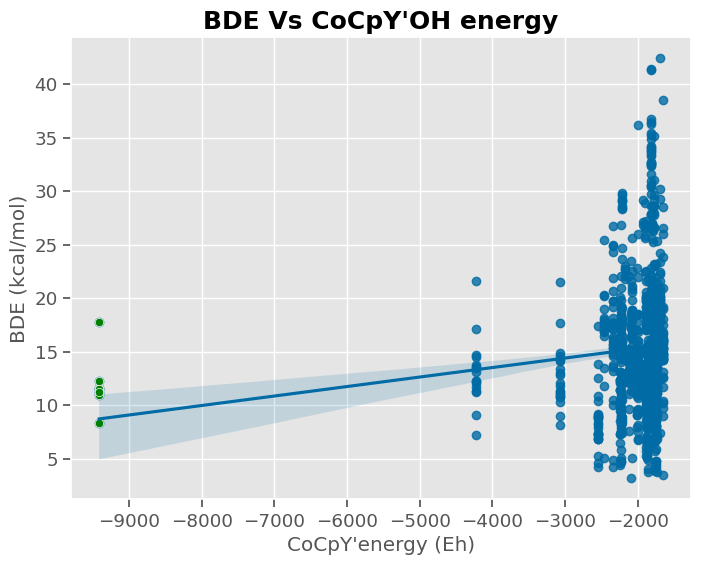

In [15]:
plt.figure(figsize=(8,6))
sns.regplot(data = ml_df, x = "CoCpY'energy (Eh)" , y = 'BDE (kcal/mol)')
sns.scatterplot(data = cocp_energy_out, x = "CoCpY'energy (Eh)" , y = 'BDE (kcal/mol)', color = 'green')
plt.title(f"BDE Vs CoCpY'OH energy", fontsize = 18, fontweight = 'bold')
plt.savefig(f'bdevscocp_energy_out.png')

In [16]:
cp_energy_out = ml_df[ml_df["CpY energy (Eh)"]<-7000]
cp_energy_out.to_excel('cp_energy_out.xlsx')
cp_energy_out

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
24,Co(Cp-N(CH₃)₂)(Cp-CBr₃)OH,-9738.638310,N(CH₃)₂,-1785.987408,CBr₃,-7952.631083,12.436455,17.8470,-0.1859,-0.0782,...,-0.0719,-0.2267,-0.1357,0.011840,0.062475,27.539320,79.34906,-33.790875,3.311007,4.058599
65,Co(Cp-OCH₃)(Cp-CBr₃)OH,-9719.173034,OCH₃,-1766.531474,CBr₃,-7952.631083,6.574309,12.7536,-0.1922,-0.0819,...,-0.0727,-0.2267,-0.1357,-0.015190,0.062475,18.015580,79.34906,-34.606625,3.299961,3.835005
105,Co(Cp-O(CO)CH₃)(Cp-CBr₃)OH,-9832.526791,O(CO)CH₃,-1879.885018,CBr₃,-7952.631083,6.707932,19.5408,-0.1862,-0.0894,...,-0.0855,-0.2267,-0.1357,0.071736,0.062475,27.133680,79.34906,-30.371000,3.297646,3.996539
144,Co(Cp-P(CH₃)₂)(Cp-CBr₃)OH,-10025.246455,P(CH₃)₂,-2072.607246,CBr₃,-7952.631083,5.099240,13.6058,-0.1910,-0.0855,...,-0.0814,-0.2267,-0.1357,-0.059590,0.062475,43.119390,79.34906,-33.100625,3.302437,3.859994
182,Co(Cp-S(CH₃))(Cp-CBr₃)OH,-10042.150696,S(CH₃),-2089.514536,CBr₃,-7952.631083,3.185810,11.9713,-0.1896,-0.0873,...,-0.0817,-0.2267,-0.1357,0.019722,0.062475,27.962050,79.34906,-32.096625,3.307588,3.763506
219,Co(Cp-Ph)(Cp-CBr₃)OH,-9835.718548,Ph,-1883.076259,CBr₃,-7952.631083,7.031545,15.6461,-0.1907,-0.0877,...,-0.0806,-0.2267,-0.1357,-0.000780,0.062475,49.573080,79.34906,-32.316250,3.290476,3.956455
255,Co(Cp-C₂H₃)(Cp-CBr₃)OH,-9682.049197,C₂H₃,-1729.412165,CBr₃,-7952.631083,3.732910,18.1152,-0.1864,-0.0897,...,-0.0802,-0.2267,-0.1357,0.008470,0.062475,17.324220,79.34906,-30.339625,3.294727,4.012085
324,Co(Cp-CH₃)(Cp-CBr₃)OH,-9643.967280,CH₃,-1691.324458,CBr₃,-7952.631083,7.365914,18.3297,-0.1866,-0.0842,...,-0.0778,-0.2267,-0.1357,-0.024960,0.062475,9.172913,79.34906,-32.128000,3.286285,4.006867
357,Co(Cp-C(CH₃)₃)(Cp-CBr₃)OH,-9761.929538,C(CH₃)₃,-1809.288023,CBr₃,-7952.631083,6.545887,18.3961,-0.1866,-0.0849,...,-0.0770,-0.2267,-0.1357,-0.029920,0.062475,43.981350,79.34906,-31.908375,3.298339,4.022779
389,Co(Cp-C₃H₇)(Cp-CBr₃)OH,-9722.607985,C₃H₇,-1769.949792,CBr₃,-7952.631083,17.011742,18.4433,-0.1864,-0.0850,...,-0.0945,-0.2267,-0.1357,-0.033870,0.062475,30.478500,79.34906,-31.814250,3.297238,4.015617


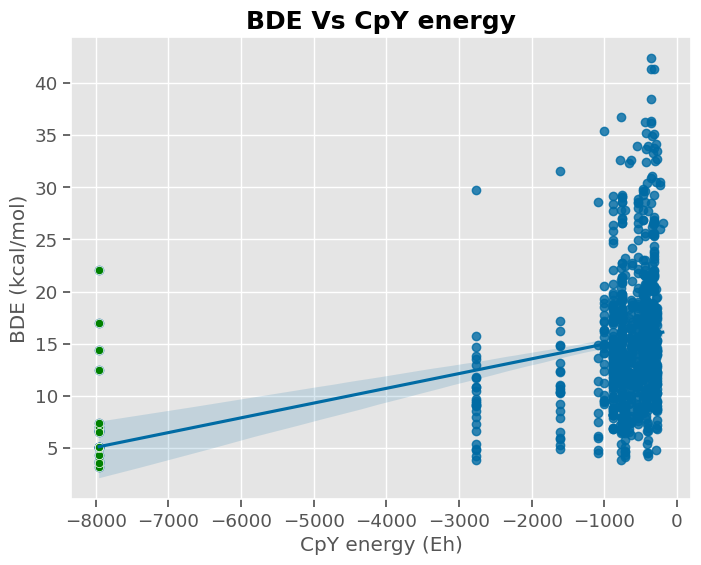

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(data = ml_df, x = "CpY energy (Eh)" , y = 'BDE (kcal/mol)')
sns.scatterplot(data = cp_energy_out, x = "CpY energy (Eh)" , y = 'BDE (kcal/mol)', color = 'green')
plt.title(f"BDE Vs CpY energy", fontsize = 18, fontweight = 'bold')
plt.savefig(f'bdevscp_energy_out.png')

In [18]:
homo_out = ml_df[ml_df["EHOMO(Co[CpY][CpY']OH) (Eh)"]<-0.21]
homo_out
homo_out.to_excel('homo_complex_outliers.xlsx')

In [19]:
feat_cols = ["EHOMO(Co[CpY][CpY']OH) (Eh)", "ELUMO(Co[CpY][CpY']OH) (Eh)",
             "EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]

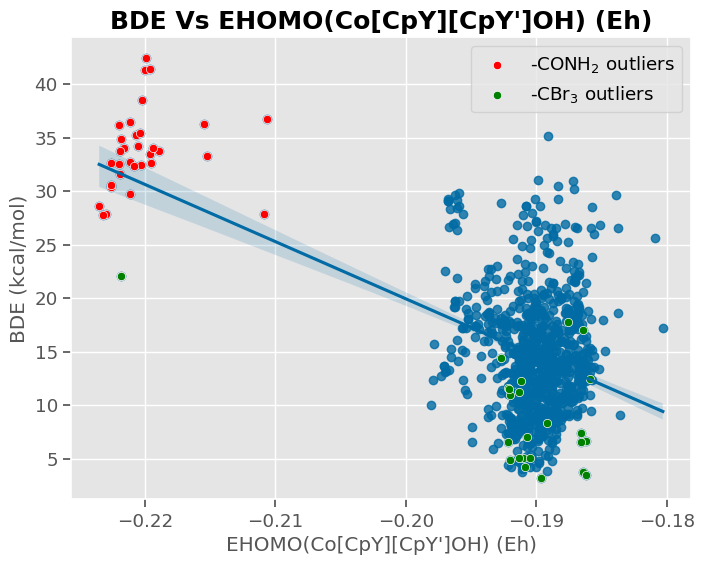

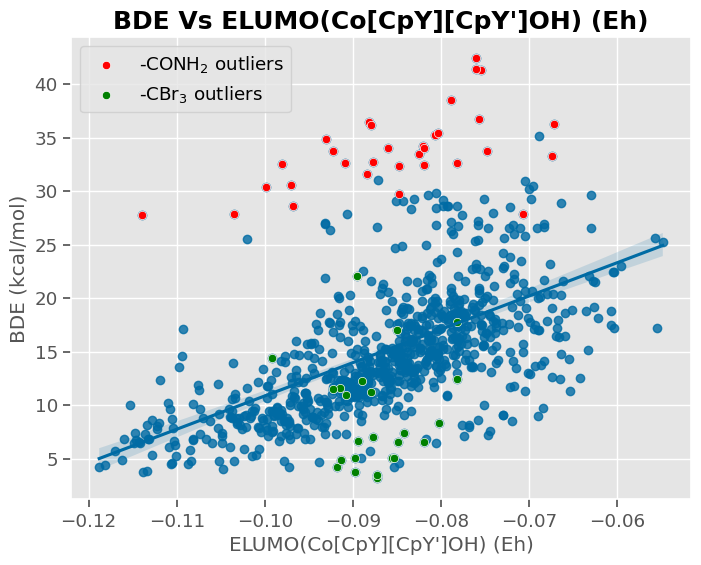

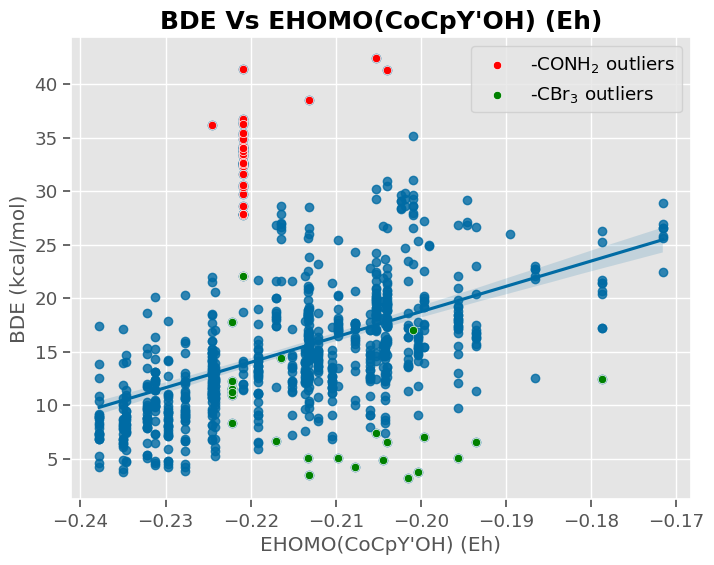

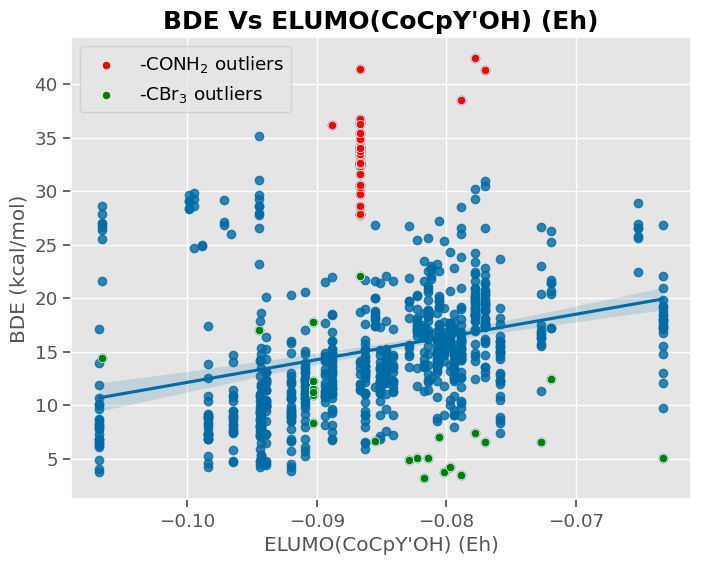

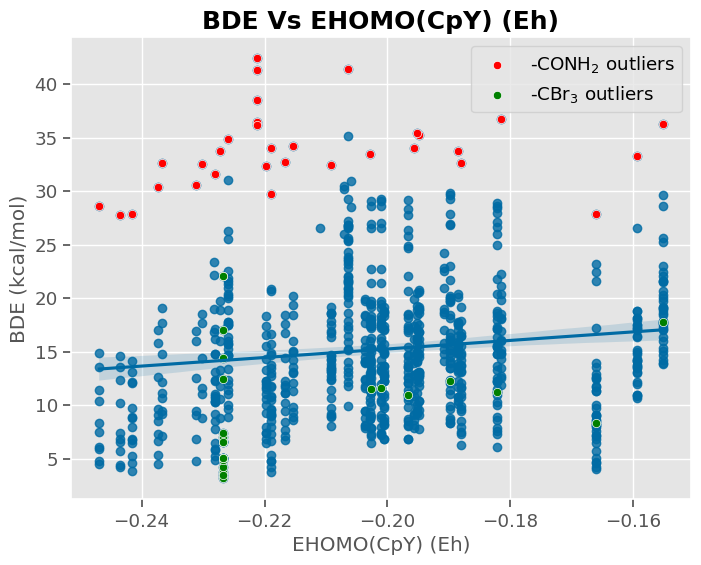

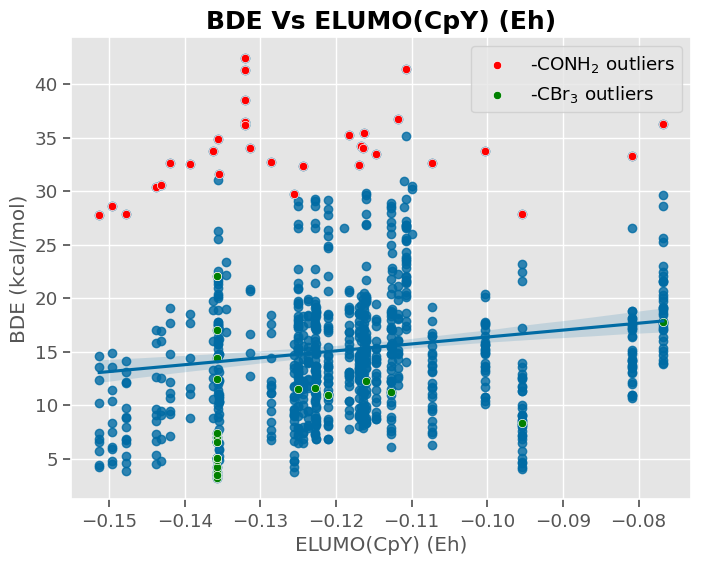

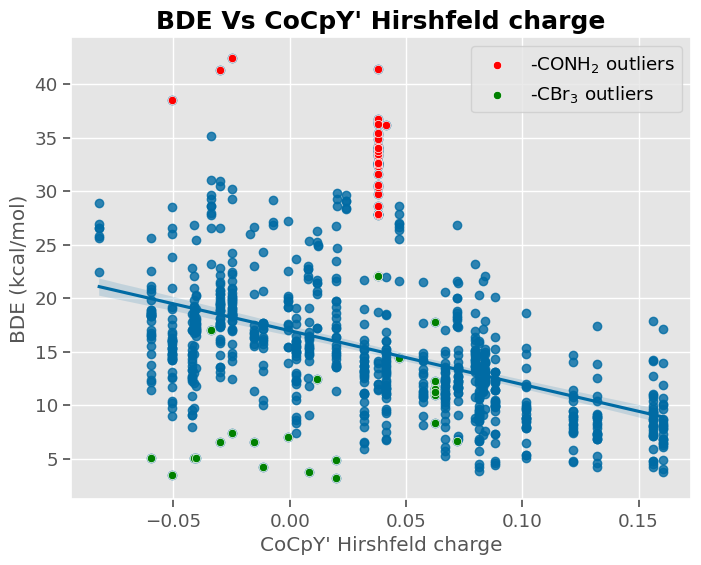

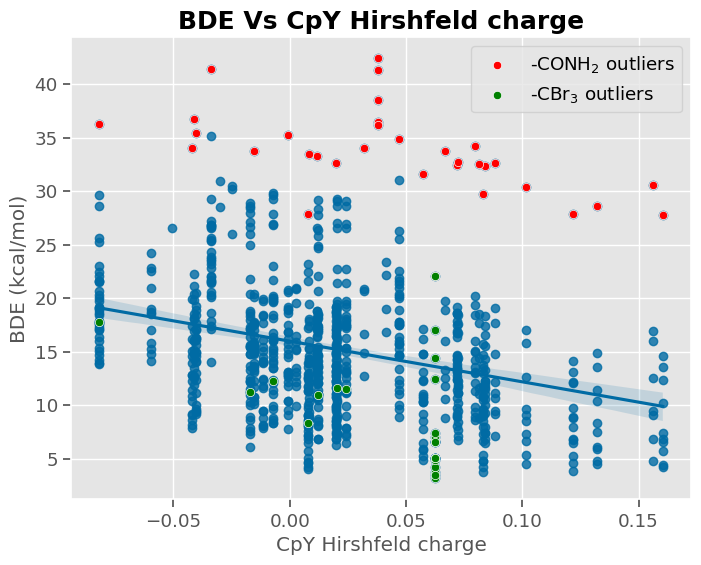

In [20]:
for i in feat_cols:
    plt.figure(figsize=(8,6))
    sns.regplot(data = ml_df, x = i , y = 'BDE (kcal/mol)')
    sns.scatterplot(data = homo_out, x = i , y = 'BDE (kcal/mol)', 
                    color = 'red', label = "-CONH$_2$ outliers")
    sns.scatterplot(data = complex_energy_out, x = i , y = 'BDE (kcal/mol)', 
                    color = 'green', label = "-CBr$_3$ outliers")
    plt.legend()
    plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
    plt.savefig(f'bdevs{i}.png')

In [21]:
homo_out

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
16,Co(Cp-N(CH₃)₂)(Cp-(CO)NH₂)OH,-2148.273764,(CO)NH₂,-1820.731773,N(CH₃)₂,-327.488954,33.281042,17.0007,-0.2152,-0.0674,...,-0.0867,-0.1594,-0.0809,0.038080,0.011840,14.944240,27.539320,-46.372250,3.319311,3.908819
57,Co(Cp-OCH₃)(Cp-(CO)NH₂)OH,-2128.809804,(CO)NH₂,-1820.731773,OCH₃,-308.024184,33.788713,14.1719,-0.2189,-0.0748,...,-0.0867,-0.1886,-0.1003,0.038080,-0.015190,14.944240,18.015580,-45.211375,3.306881,3.904416
97,Co(Cp-O(CO)CH₃)(Cp-(CO)NH₂)OH,-2242.162489,(CO)NH₂,-1820.731773,O(CO)CH₃,-421.379015,32.442714,14.3682,-0.2203,-0.0819,...,-0.0867,-0.2092,-0.1170,0.038080,0.071736,14.944240,27.133680,-43.423000,3.300333,3.913144
174,Co(Cp-S(CH₃))(Cp-(CO)NH₂)OH,-2451.789957,(CO)NH₂,-1820.731773,S(CH₃),-631.006222,32.606146,14.1269,-0.2195,-0.0782,...,-0.0867,-0.1880,-0.1073,0.038080,0.019722,14.944240,27.962050,-44.332875,3.297037,3.994029
211,Co(Cp-Ph)(Cp-(CO)NH₂)OH,-2245.356730,(CO)NH₂,-1820.731773,Ph,-424.568808,35.233200,15.5341,-0.2207,-0.0807,...,-0.0867,-0.1949,-0.1183,0.038080,-0.000780,14.944240,49.573080,-43.925000,3.295711,4.294814
247,Co(Cp-C₂H₃)(Cp-(CO)NH₂)OH,-2091.686701,(CO)NH₂,-1820.731773,C₂H₃,-270.901568,33.483855,13.7513,-0.2196,-0.0825,...,-0.0867,-0.2029,-0.1147,0.038080,0.008470,14.944240,17.324220,-43.015125,3.302911,3.923493
282,Co(Cp-C₂H)(Cp-(CO)NH₂)OH,-2090.423333,(CO)NH₂,-1820.731773,C₂H,-269.639453,32.697134,13.9087,-0.2211,-0.0877,...,-0.0867,-0.2166,-0.1286,0.038080,0.072356,14.944240,12.952910,-41.854250,3.301065,3.989214
316,Co(Cp-CH₃)(Cp-(CO)NH₂)OH,-2053.605197,CH₃,-1691.324458,(CO)NH₂,-362.213148,42.413274,15.1973,-0.2199,-0.0760,...,-0.0778,-0.2213,-0.1320,-0.024960,0.038080,9.172913,14.944240,-45.148625,3.297314,3.996432
349,Co(Cp-C(CH₃)₃)(Cp-(CO)NH₂)OH,-2171.567087,C(CH₃)₃,-1809.288023,(CO)NH₂,-362.213148,41.362343,15.4982,-0.2200,-0.0755,...,-0.0770,-0.2213,-0.1320,-0.029920,0.038080,43.981350,14.944240,-45.336875,3.296477,4.083077
381,Co(Cp-C₃H₇)(Cp-(CO)NH₂)OH,-2132.244618,(CO)NH₂,-1820.731773,C₃H₇,-311.446892,41.385716,14.0558,-0.2196,-0.0760,...,-0.0867,-0.2064,-0.1107,0.038080,-0.033870,14.944240,30.478500,-45.054500,3.300887,3.926217


In [22]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1f77b4', alpha =0.5, lw=4),
                Line2D([0], [0], color='magenta', alpha =0.7, lw=4)]


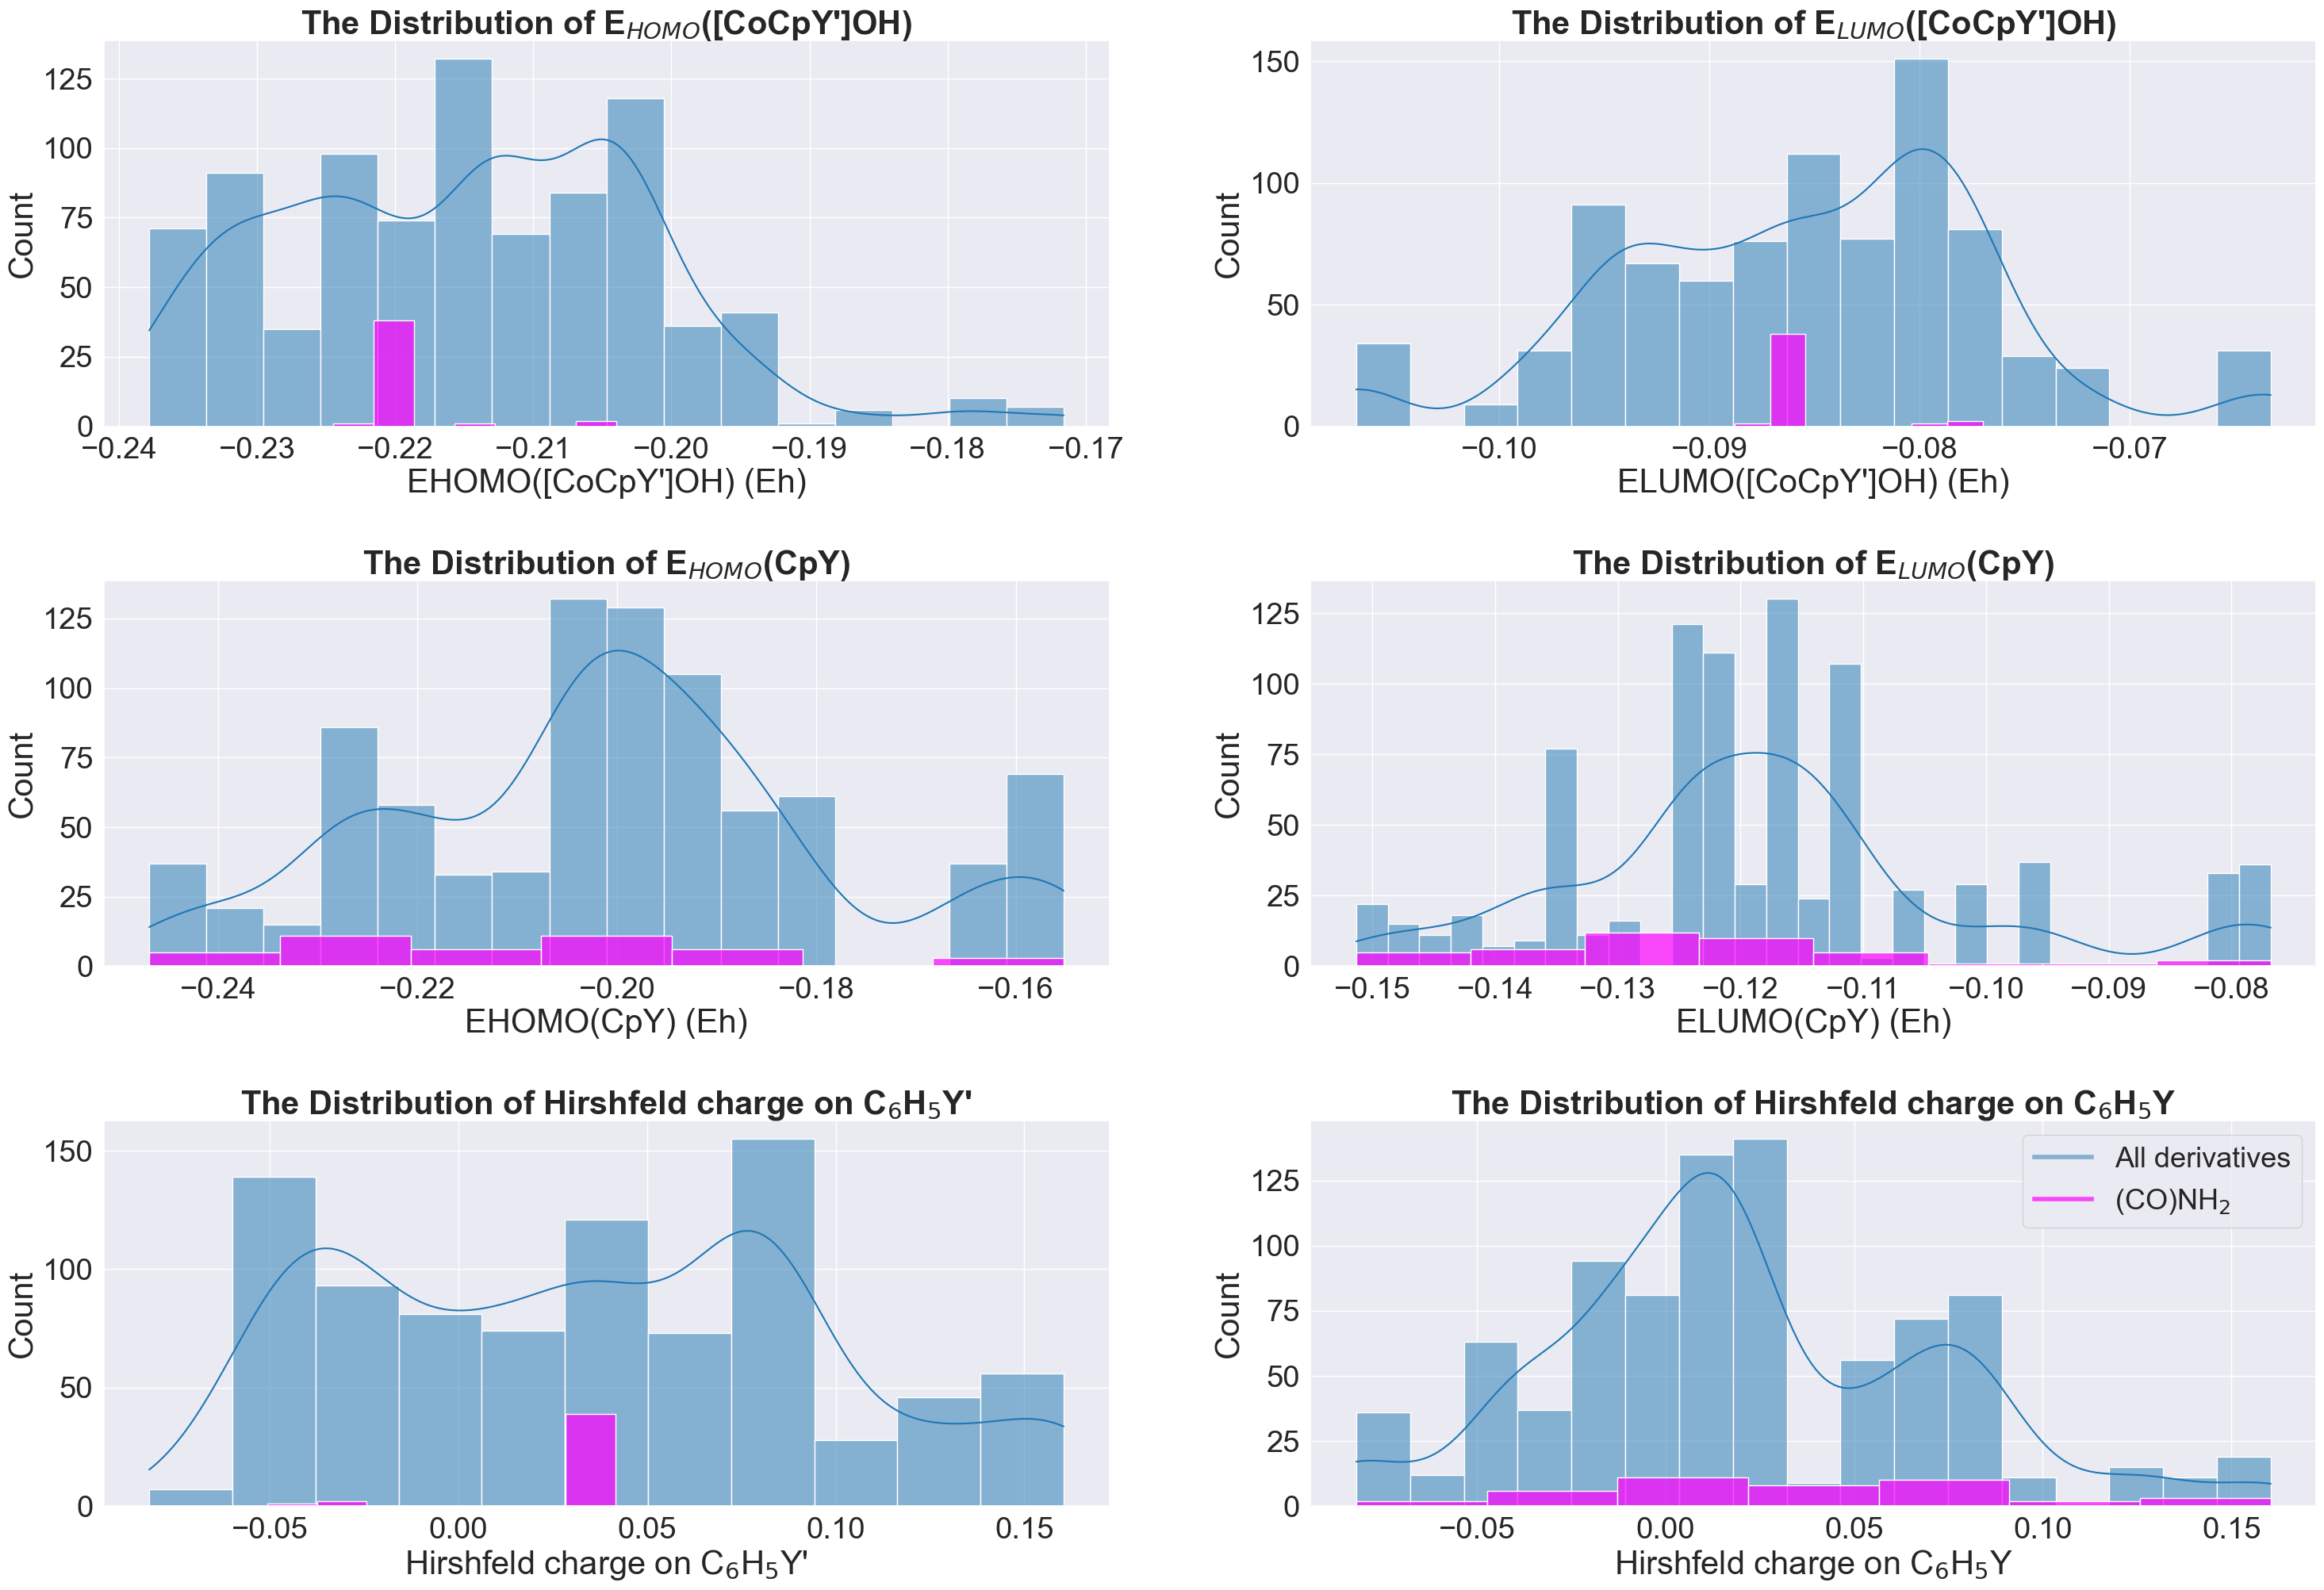

In [30]:
frag_feat_cols = ["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]
frag_feat_title = ["E$_{HOMO}$([CoCpY']OH)", "E$_{LUMO}$([CoCpY']OH)", 
              "E$_{HOMO}$(CpY)", "E$_{LUMO}$(CpY)", 
              "Hirshfeld charge on C$_6$H$_5$Y'", "Hirshfeld charge on C$_6$H$_5$Y"]
xlabels = ["EHOMO([CoCpY']OH) (Eh)", "ELUMO([CoCpY']OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "Hirshfeld charge on C$_6$H$_5$Y'", "Hirshfeld charge on C$_6$H$_5$Y"]
sns.set(font_scale=2.5)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.4, wspace=0.2)
axes = axes.ravel()
plt.legend(custom_lines, ['All derivatives','(CO)NH$_2$'], bbox_to_anchor=(1,1), fontsize=26)
for i, col in enumerate(frag_feat_cols):
    #plt.figure(figsize=(8,6))

    sns.histplot(data = ml_df, x = col ,bins = 'auto', ax = axes[i], alpha = 0.5, color = '#1f77b4', kde = True)
    sns.histplot(data = conh2_df, x = col ,bins = 'auto', ax = axes[i],  color='magenta', alpha =0.7)
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_title(f'The Distribution of {frag_feat_title[i]}', fontweight = 'bold')
    



plt.savefig('all_feat_out.png')

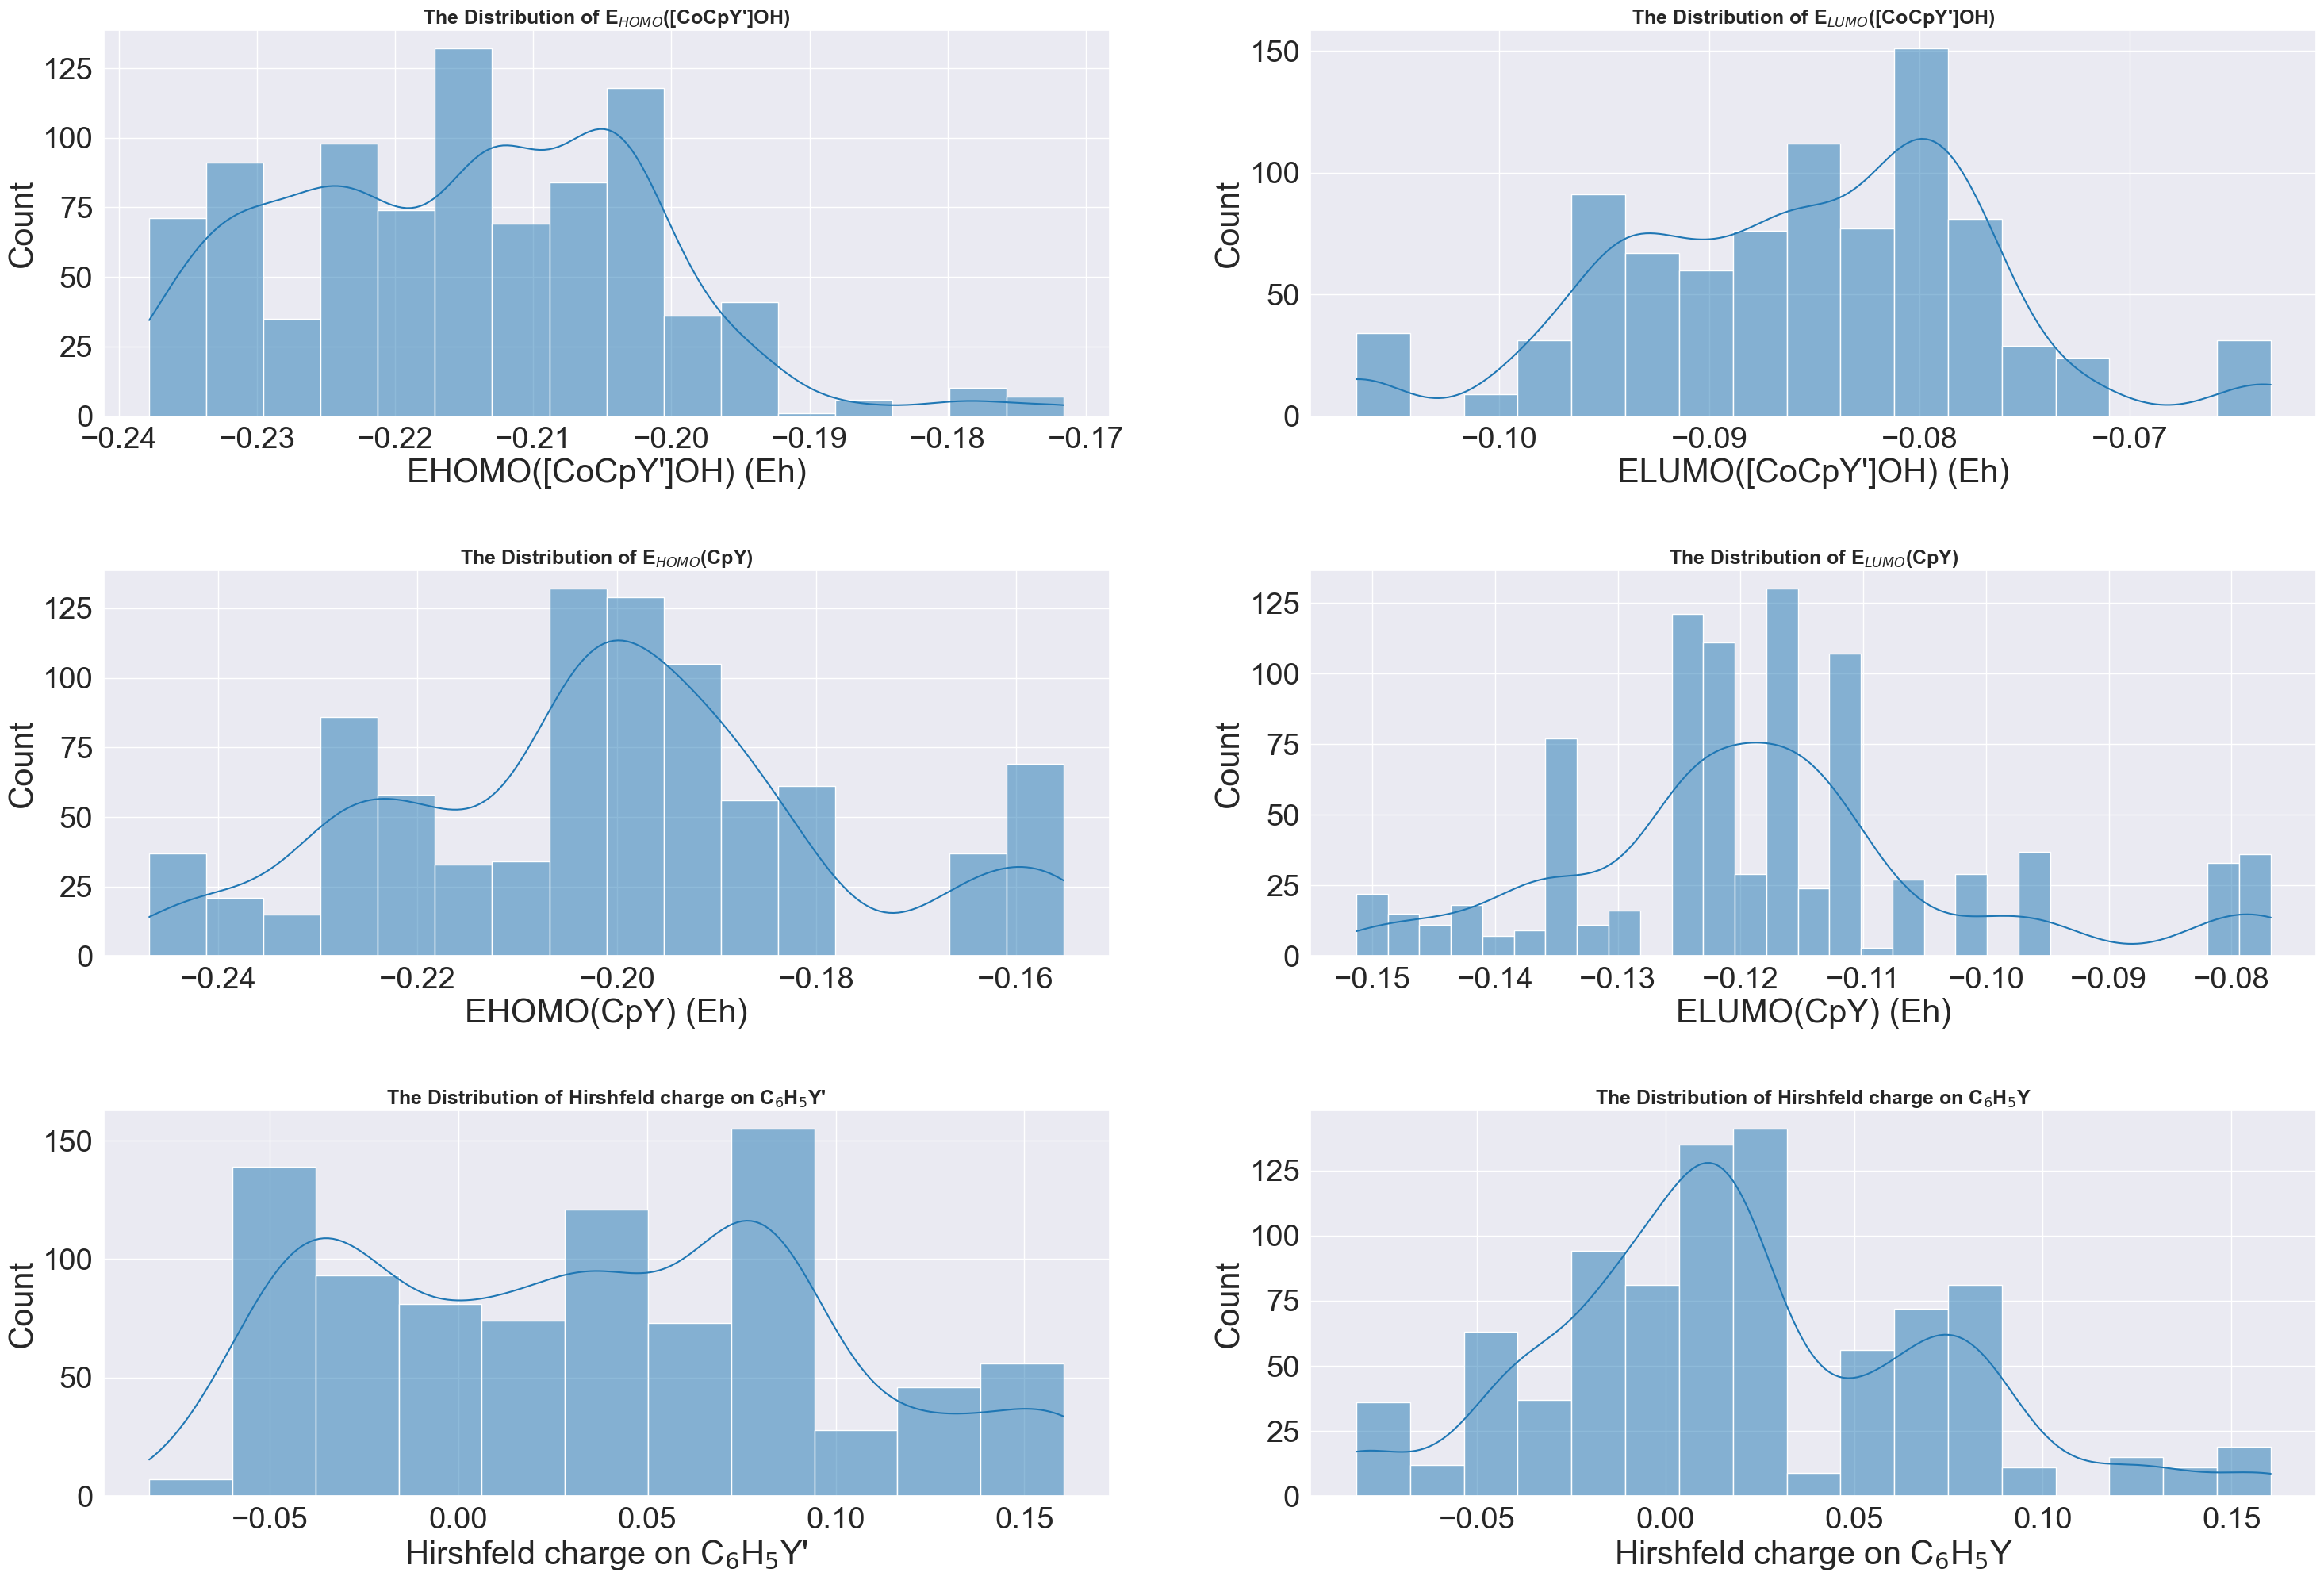

In [31]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.4, wspace=0.2)
axes = axes.ravel()
for i, col in enumerate(frag_feat_cols):
    sns.histplot(data = ml_df, x = col ,bins = 'auto', kde=True, ax = axes[i] , color = '#1f77b4' )
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_title(f'The Distribution of {frag_feat_title[i]}', fontsize = 18, fontweight = 'bold')
plt.savefig('all_feat.png')

In [25]:
ml_df.columns

Index(['Name', 'Co[CpY][CpY']OH energy (Eh)', 'CoCpY' name',
       'CoCpY'energy (Eh)', 'CpY name', 'CpY energy (Eh)', 'BDE (kcal/mol)',
       'Dipole moment(Debye)', 'EHOMO(Co[CpY][CpY']OH) (Eh)',
       'ELUMO(Co[CpY][CpY']OH) (Eh)', 'EHOMO(CoCpY'OH) (Eh)',
       'ELUMO(CoCpY'OH) (Eh)', 'EHOMO(CpY) (Eh)', 'ELUMO(CpY) (Eh)',
       'CoCpY' Hirshfeld charge', 'CpY Hirshfeld charge',
       'CoCpY' polarizability', 'CpY polarizability', 'Hardness (kcal/mol)',
       'dCOM (Å)', 'rCo-O (Å)'],
      dtype='object')

In [32]:
complex_feat_cols = ["Co[CpY][CpY']OH energy (Eh)","CoCpY'energy (Eh)","CpY energy (Eh)",
"BDE (kcal/mol)","EHOMO(Co[CpY][CpY']OH) (Eh)","ELUMO(Co[CpY][CpY']OH) (Eh)"  ]

#complex_feat_title = ["Co[CpY][CpY']OH energy","CoCpY'energy","CpY energy",
#"BDE","E$_{HOMO}$(Co[CpY][CpY']OH)","E$_{LUMO}$(Co[CpY][CpY']OH)" ]
complex_feat_title = ["[CoCpY'CpY]OH energy","[CoCpY']OH energy","CpY energy",
"BDE","E$_{HOMO}$([CoCpY'CpY]OH)","E$_{LUMO}$([CoCpY'CpY]OH)" ]

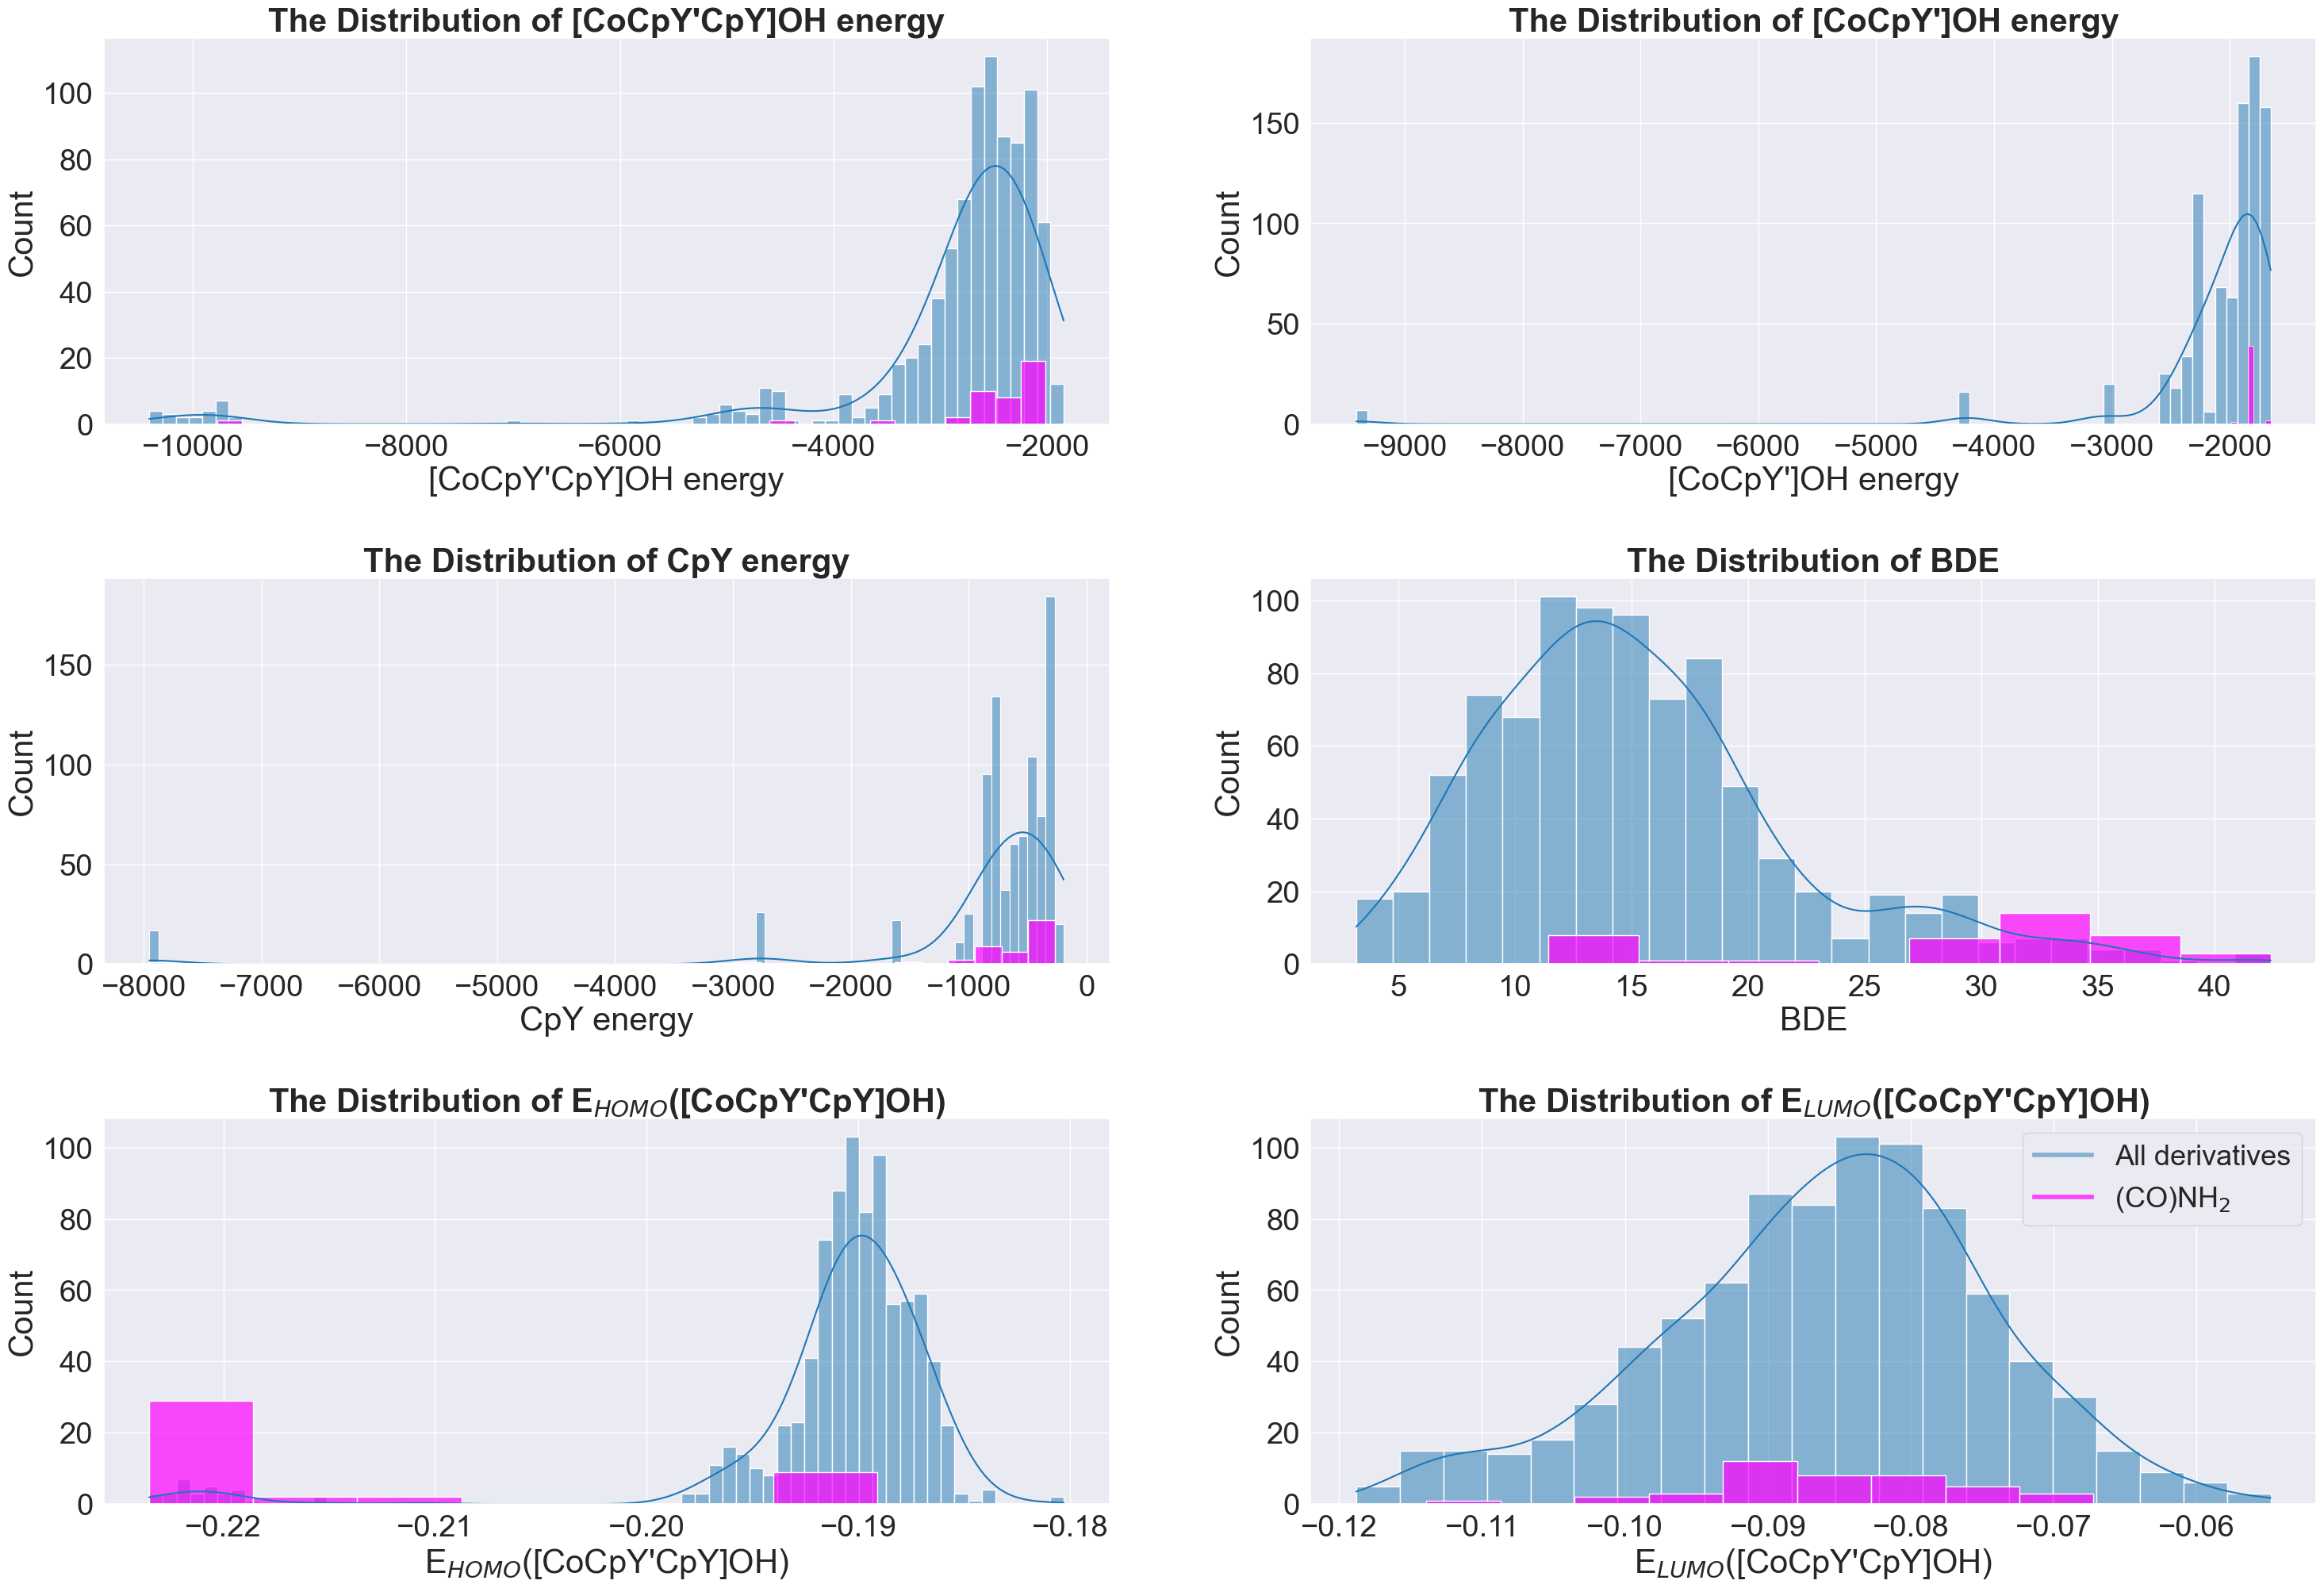

In [33]:
sns.set(font_scale=2.5)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.4, wspace=0.2)
axes = axes.ravel()
plt.legend(custom_lines, ['All derivatives','(CO)NH$_2$'], bbox_to_anchor=(1,1), fontsize=26)
for i, col in enumerate(complex_feat_cols):
    sns.histplot(data = ml_df, x = col ,bins = 'auto', kde=True, ax = axes[i] , color = '#1f77b4' )
    sns.histplot(data = conh2_df, x = col ,bins = 'auto', ax = axes[i],  color='magenta', alpha =0.7)
    axes[i].set_xlabel(complex_feat_title[i])
    axes[i].set_title(f'The Distribution of {complex_feat_title[i]}', fontweight = 'bold')

plt.savefig('complex_feat.png')

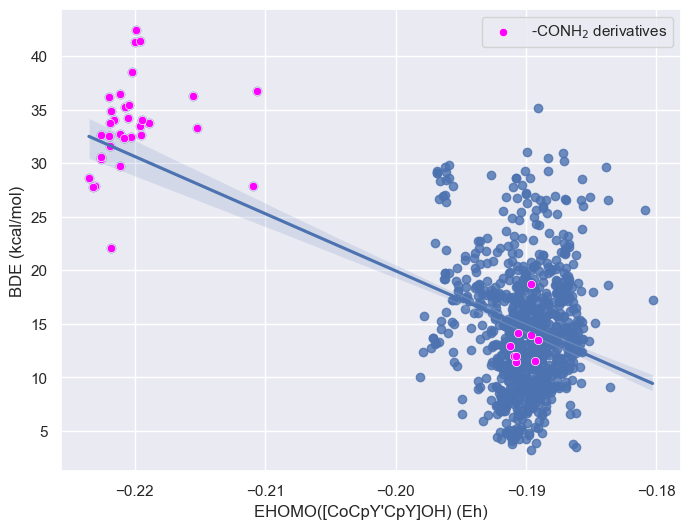

In [30]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))
sns.regplot(data = ml_df, x = "EHOMO(Co[CpY][CpY']OH) (Eh)" , y = 'BDE (kcal/mol)')
sns.scatterplot(data = conh2_df, x = "EHOMO(Co[CpY][CpY']OH) (Eh)" , y = 'BDE (kcal/mol)', 
                    color = 'magenta', label = "-CONH$_2$ derivatives")
plt.xlabel("EHOMO([CoCpY'CpY]OH) (Eh)")
#plt.xlabel("E$_{HOMO}$(Co[CpY][CpY']OH)")
plt.legend()
#plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
plt.savefig('bdeVScomplexhomo.png')